In [4]:
import sys
import numpy as np
sys.path.append("/SNS/users/imeliamb/git/machine_learning/src")
import importlib
import models
import os
import matplotlib
import matplotlib.pyplot as plt

In [9]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs_pars.npy"))[:1000000]
refl = np.load(os.path.join(data_dir, "orhs_data.npy"))[:1000000]
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

#refl = np.power(10, refl)/q_values**2*q_values[0]**2

idx = 0

#refl= np.asarray(refl[:-nset])
#pars= np.asarray (pars[:-nset])

testset= np.asarray(refl[:1000000])
testsetout= np.asarray (pars[:1000000])
    

(1000000,)
(1000000, 100)
(100,)


In [10]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 10

ae_model, encoder, decoder =models.auto_encoder(n_data, n_features, n_outputs)
history = ae_model.fit(refl, refl,
                        epochs=75, batch_size=256,
                        validation_data=(testset, testset))
#models.save_model(ae_model, encoder, decoder, "/SNS/users/imeliamb/git/machine_learning/data")
importlib.reload(models)
models.save_model(ae_model, encoder, decoder, "/SNS/users/vogtdan000/data/ml")

Auto-encoder ready
Epoch 1/75
3907/3907 [==============================] - 55s 14ms/step - loss: 0.0543 - val_loss: 0.0118
Epoch 2/75
3907/3907 [==============================] - 53s 13ms/step - loss: 0.0092 - val_loss: 0.0072
Epoch 3/75
3907/3907 [==============================] - 54s 14ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 4/75
3907/3907 [==============================] - 54s 14ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 5/75
3907/3907 [==============================] - 55s 14ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 6/75
3907/3907 [==============================] - 56s 14ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/75
3907/3907 [==============================] - 56s 14ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/75
3907/3907 [==============================] - 56s 14ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 9/75
3907/3907 [==============================] - 56s 14ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 10/75
3907/3907 [======================

In [8]:
importlib.reload(models)
models.save_model(ae_model, encoder, decoder, "/SNS/users/vogtdan000/data/ml")

In [11]:
y_pred = ae_model.predict(testset)
latent_space = encoder.predict(testset)
print(y_pred.shape)
print(latent_space.shape)
idx=0

31250/31250 [==============================] - 48s 2ms/step
(1000000, 100)
(1000000, 10)


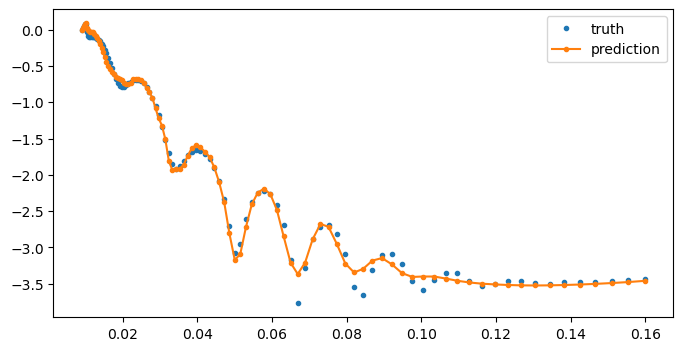

In [29]:
fig=plt.figure(dpi=100, figsize=[8,4])
plt.plot(q_values, testset[idx], marker='.', linestyle='', label='truth')
plt.plot(q_values, y_pred[idx], marker='.', linestyle='-', label='prediction')

plt.legend()
plt.show()

idx=idx+1

In [51]:
from sklearn.manifold import TSNE
tsne1 = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(latent_space).T


(2, 1000)


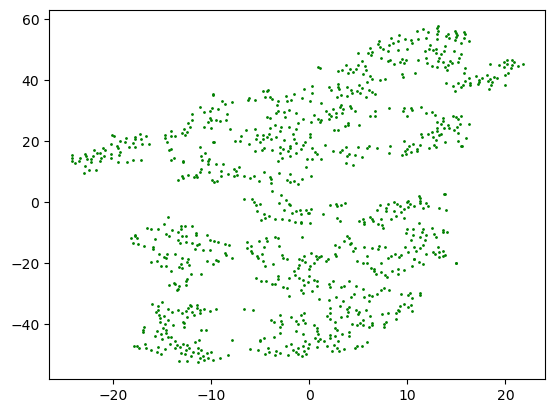

In [34]:
print(tsne1.shape)
fig = plt.figure()
plt.scatter(tsne1[0], tsne1[1], c='green', s=1)
plt.show()